In [38]:
import folium
from geopy.geocoders import Nominatim
import numpy as np
import geojsoncontour


In [72]:
def get_geocodes(locations):
    """Gets the lattitude and longitude of all locations
    locations: list of geographical locations or addresses"""
    locSize=len(locations)
    lats, longs = np.zeros(locSize),np.zeros(locSize)
    for i in range(locSize):
        place = geolocator.geocode(locations[i])
        lats[i]= place.latitude
        longs[i] = place.longitude
    return(lats, longs)

def get_midpoint(x):
    """finds the min and max of a numpy array
    x: numpy array of numerical values
    """
    return((x.min()+x.max())/2)

#def get_box

def make_map(locations,colors,name='Test'):
    geolocator = Nominatim(user_agent='Idaho')
    m = folium.Map()

In [ ]:
places=['Rockland, ID','460 E 950 N Richfield UT','11126 N River Rd, Payette ID']
dates = ['12-2-2020','8-4-2021','1-2-2022']
date_range = ['12-2-2020','Current']

In [90]:
geolocator = Nominatim(user_agent='Idaho')
lat, lng = get_geocodes(places)
m = folium.Map(location=(get_midpoint(lat), get_midpoint(lng)),zoom_start=7)
for i in range(len(lat)):
        folium.Marker([lat[i], lng[i]], popup=f"<strong>{i}</strong>", tooltip=f'{places[i]}', icon=folium.Icon(color='green')).add_to(m)

In [ ]:
plt.contourf()

In [91]:
m

In [106]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

[2.24291292e-232 2.17445957e-001 4.34891914e-001 6.52337871e-001
 8.69783828e-001 1.08722979e+000 1.30467574e+000]


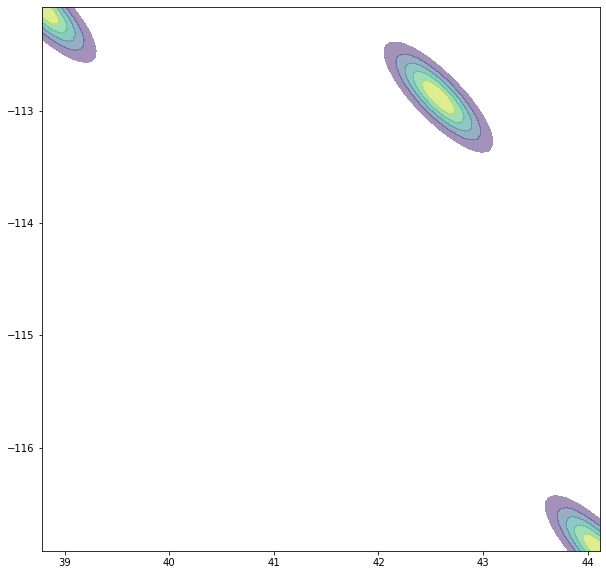

In [107]:
x,y=lat,lng
xi, yi = np.mgrid[x.min():x.max():100j,y.min():y.max():100j]
fig,ax = plt.subplots(figsize=(10,10))

positions = np.vstack([xi.ravel(), yi.ravel()])
k = gaussian_kde(np.array((x,y)), bw_method=0.1)

f = np.reshape(k(positions).T, xi.shape)

linsep = np.linspace(min(k(positions).T), max(k(positions).T), 7)
print(linsep)
plt.contourf(xi, yi, f, np.linspace(linsep[1], max(k(positions).T), 6), 
            alpha=0.5)



In [56]:
for i in places:
    place = geolocator.geocode(i)
    print(place.latitude, place.longitude)
    tooltip = f"{i}"
    folium.Marker([place.latitude, place.longitude], popup=f"<strong>{i}</strong>", tooltip=tooltip, icon=folium.Icon(color='green')).add_to(m)

42.5732468 -112.8772126
38.78116951010561 -112.07710605007273
44.1146846801399 -116.91702728302758


Location(11126, North River Road, Payette, Payette County, Idaho, 83661, United States, (44.1146846801399, -116.91702728302758, 0.0))

In [15]:
m.save('map.html')